# Pretty Plot
## Alexandra Higley

Pretty star plots to demonstrate positional changes from the observatory project 

In [1]:
import numpy as np
from pylab import *
from math import e
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.cm as cm
from astropy import units as u
from astropy.coordinates import SkyCoord
import glob
#import os

import astroquery
from astropy.io import fits
from astropy.wcs import WCS
from astroquery.skyview import SkyView
import matplotlib.pyplot as plt
import urllib

Trials

In [2]:
dumbell = SkyCoord(299.902*u.deg, 22.7212*u.deg, frame='icrs') #latitude & longitude

#degrees
dumb1_deg = dumbell.ra.degree
dumb2_deg = dumbell.dec.degree

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 299.902  22.7212  
CRPIX : 150.5  150.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00047222219999999997  0.00047222219999999997  
NAXIS : 300  300


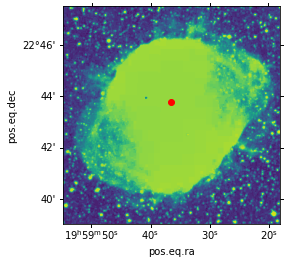

In [3]:
#Joe's program 

# Function to Get a Survey Image Provided the Object Position & Survey Name
# May need a downgrade of HTML5Lib: pip install --upgrade html5lib==1.0b8
def getSVImg(SC_ObjPos, SkyViewSurvey, pix):
    """
    Input: a SkyCoord Position Vector and a Survey Type that is Compatable with NASA SkyView
    Output: A Numpy Pixel Array and Header Array
    """
    img_survey, pix_survey, hdr_survey = None, None, None
    try:
        img_survey = SkyView.get_images(position=SC_ObjPos, survey=[SkyViewSurvey],
                                        coordinates="J2000", pixels=pix)
        if len(img_survey) > 0:
            pix_survey = img_survey[0][0].data
            hdr_survey = img_survey[0][0].header
    except (astroquery.exceptions.TimeoutError, urllib.error.HTTPError):
        pix_survey, hdr_survey = None, None
    return pix_survey, hdr_survey

if __name__ == "__main__":
    # Demo to Showcase that the SkyView image is working.
    Survey = 'DSS'
    #Survey = 'Fermi 5'
    ObjPos = 'Dumbbell Nebula'
    pix=300
    pixels, header = getSVImg(ObjPos, Survey, pix)
    
    WCS_helix = WCS(header)
    print(WCS_helix)
    
    fig = plt.figure()
    #ax = plt.subplot(projection=self.TPF.wcs)
    ax = plt.subplot(projection=WCS_helix)
    ax.get_transform(WCS(header))
    ax.imshow(pixels)
    
    ax.scatter(299.902*u.deg, 22.73*u.deg, color = "red", transform=ax.get_transform('fk5'))
    #ax.plot('19h44m00s', 22.7212*u.deg, markersize = 17, color = "red", transform=ax.get_transform('barycentrictrueecliptic'))
    
    plt.show()

In [4]:
J0340long = 62.6145455460622062521247599 #first crazy one
J0340lat = 21.3325446194676085088365314

J0340longf = 62.6162150528992834143393598 
J0340latf = 21.3351396400489844214914958 

josh = SkyCoord(J0340long*u.deg, J0340lat*u.deg, frame='barycentrictrueecliptic')
joshf = SkyCoord(J0340longf*u.deg, J0340latf*u.deg, frame='barycentrictrueecliptic')

from astropy.coordinates import ICRS
Jtimout1 = josh.transform_to('icrs') #RA and DEC 
Jtimout1f = joshf.transform_to('icrs') #RA and DEC 

#radians
Jra_radw1 = Jtimout1.ra.wrap_at(180 * u.deg).radian
Jdec_radw1 = Jtimout1.dec.radian

Jra_radw1f = Jtimout1f.ra.wrap_at(180 * u.deg).radian
Jdec_radw1f = Jtimout1f.dec.radian

#degrees
jboir_deg = Jtimout1.ra.degree
jboid_deg = Jtimout1.dec.degree

jboir_degf = Jtimout1f.ra.degree
jboid_degf = Jtimout1f.dec.degree


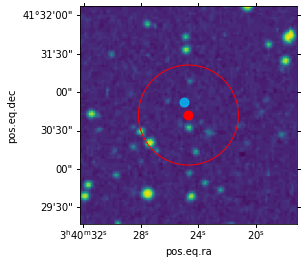

In [17]:
#circle showing the resolution of the telescope ;
if __name__ == "__main__":
    # Demo to Showcase that the SkyView image is working.
    Survey = 'DSS'
    #Survey = 'Fermi 5'
    ObjPos = 'Dumbbell Nebula'
    pix=100
    pixels, header = getSVImg(josh, Survey, pix)
    
    WCS_helix = WCS(header)
    #print(WCS_helix)
    
    fig = plt.figure()
    #ax = plt.subplot(projection=self.TPF.wcs)
    ax = plt.subplot(projection=WCS_helix)
    ax.get_transform(WCS(header))
    ax.imshow(pixels)
    
    ax.scatter(jboir_deg*u.deg, jboid_deg*u.deg, transform=ax.get_transform('fk5'),facecolors='none', edgecolors='r', s=10000)
    #ax.scatter(jboir_degf*u.deg, jboid_degf*u.deg, transform=ax.get_transform('fk5'),facecolors='none', edgecolors='lightblue', s=300)
    
    ax.scatter(jboir_deg*u.deg, jboid_deg*u.deg, transform=ax.get_transform('fk5'), color="red", s=80)
    ax.scatter(jboir_degf*u.deg, jboid_degf*u.deg, transform=ax.get_transform('fk5'), color="deepskyblue", alpha=0.8, s=80)
    
    
    plt.show()